# Spam Message Classification with ML

The spam message classification project aims to develop a machine learning model that can accurately classify text messages as either spam or non-spam (ham). With the increasing volume of spam messages, this project is essential in helping users filter out unwanted messages and prioritize important ones.

# Importing Libraries

These are just a few examples of popular Python libraries. You can import any other library using the same import statement followed by the library name or alias:

NumPy: for numerical operations and array manipulation

Pandas: for data manipulation and analysis

Matplotlib: for creating visualizations

Scikit-learn: for machine learning algorithms

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [4]:
dataframe = pd.read_csv('SPAM text message 20170820 - Data.csv')

# Data Exploration

Data exploration is an essential step in any machine learning project, including spam message classification. It involves gaining a deeper understanding of the dataset, its characteristics, and the relationships between its variables.

In [5]:
dataframe.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
dataframe.tail()

,Category,Message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [7]:
dataframe.shape

(5572, 2)

In [8]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [9]:
dataframe['Category'].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

In [10]:
dataframe.isna().sum()

Category    0
Message     0
dtype: int64

In [11]:
dataframe.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [13]:
dataframe['Category'].value_counts() / (len(dataframe))

ham     0.865937
spam    0.134063
Name: Category, dtype: float64

In [14]:
ham = dataframe[dataframe['Category'] == 'ham']
spam = dataframe[dataframe['Category'] == 'spam']

In [16]:
ham.shape, spam.shape

((4825, 2), (747, 2))

In [17]:
ham = ham.sample(spam.shape[0])

In [18]:
ham.shape

(747, 2)

In [19]:
ham.shape, spam.shape

((747, 2), (747, 2))

In [20]:
dataset = ham.append(spam, ignore_index = True)

In [21]:
dataset.shape

(1494, 2)

In [22]:
dataset['Category'].value_counts()

ham     747
spam    747
Name: Category, dtype: int64

In [23]:
dataset.head()

,Category,Message
0,ham,He says he'll give me a call when his friend's...
1,ham,"I haven't forgotten you, i might have a couple..."
2,ham,K sure am in my relatives home. Sms me de. Pls:-)
3,ham,U in town alone?
4,ham,If i not meeting ü all rite then i'll go home ...


# Splitting Dataset

Splitting a dataset refers to the process of dividing a given dataset into two or more subsets for training and evaluation purposes. The most common type of split is between the training set and the testing (or validation) set. This division allows us to assess the performance of a machine learning model on unseen data and evaluate its generalization capabilities.

Train-Test Split: This is the most basic type of split, where the dataset is divided into a training set and a testing set. The training set is used to train the machine learning model, while the testing set is used to evaluate its performance. The split is typically done using a fixed ratio, such as 80% for training and 20% for testing.

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train, x_test, y_train, y_test = train_test_split(dataset['Message'], 
                                                    dataset['Category'],
                                                    test_size = 0.2, 
                                                    random_state = 101, 
                                                    shuffle = True)

In [26]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1195,), (299,), (1195,), (299,))

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [34]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('classifier', RandomForestClassifier())
])

In [35]:
pipeline.fit(x_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

In [36]:
y_pred = pipeline.predict(x_test)

# Error Analysis

Error analysis is a crucial step in evaluating and improving the performance of a spam message classification model. It involves analyzing the errors made by the model to gain insights into the types of misclassifications and identify patterns or common characteristics that contribute to these errors.

In [39]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

The accuracy score is calculated using the following formula:

Accuracy = (Number of Correct Predictions) / (Total Number of Predictions)

In [41]:
accuracy_score = accuracy_score(y_test, y_pred)

In [42]:
accuracy_score

0.9431438127090301

A classification report is a summary of various evaluation metrics for a classification model. It provides a comprehensive overview of the model's performance, including metrics such as precision, recall, F1 score, and support.

In [46]:
classification_report = classification_report(y_test, y_pred)

In [47]:
print(classification_report)

              precision    recall  f1-score   support

         ham       0.90      1.00      0.95       153
        spam       1.00      0.88      0.94       146

    accuracy                           0.94       299
   macro avg       0.95      0.94      0.94       299
weighted avg       0.95      0.94      0.94       299



A confusion matrix is a table that summarizes the performance of a classification model by showing the counts of true positive (TP), true negative (TN), false positive (FP), and false negative (FN) predictions. It is a useful tool for evaluating the accuracy and effectiveness of a classification model.

In [48]:
confusion_matrix = confusion_matrix(y_test, y_pred)

In [49]:
confusion_matrix

array([[153,   0],
       [ 17, 129]], dtype=int64)

<AxesSubplot:>

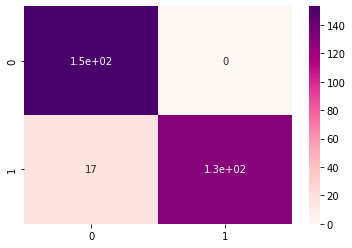

In [50]:
plt.figure(figsize = (6, 4))
sns.heatmap(
    confusion_matrix, 
    annot = True,
    cmap = 'RdPu'
)

# Predicting

In [38]:
print(y_pred[4]), print(y_test.iloc[4])

spam
spam


(None, None)

In [56]:
print(y_pred[3]), print(y_test.iloc[3])

ham
ham


(None, None)

In [51]:
test_text_1 = ['We love OnePiece']
test_text_2 = ['Luffy will become King Of Pirates']
test_text_3 = ['Horimiya Piece is gonna break the internet']

In [52]:
print(pipeline.predict(test_text_1))
print(pipeline.predict(test_text_2))
print(pipeline.predict(test_text_3))

['ham']
['ham']
['ham']
